----

#### Leitura e visualização de dados:

##### Importando Bibliotecas de leitura e visualização:

In [3]:
import pandas as pd
import seaborn as sns

#Ignorar Warnings nas saídas:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

##### Lendo o dataframe

In [4]:
df = pd.read_csv('../Data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##### Verificando o balanceamento do Dataset:

In [5]:
balance = df['stroke'].value_counts(normalize=True)
print(f'#  Balanceamento\n1: {round(balance[1]* 100, 2)}%\n0: {round(balance[0] * 100, 2)}%')

#  Balanceamento
1: 4.87%
0: 95.13%


##### Visualizando a distribuição dos dados em relação ao target (output)

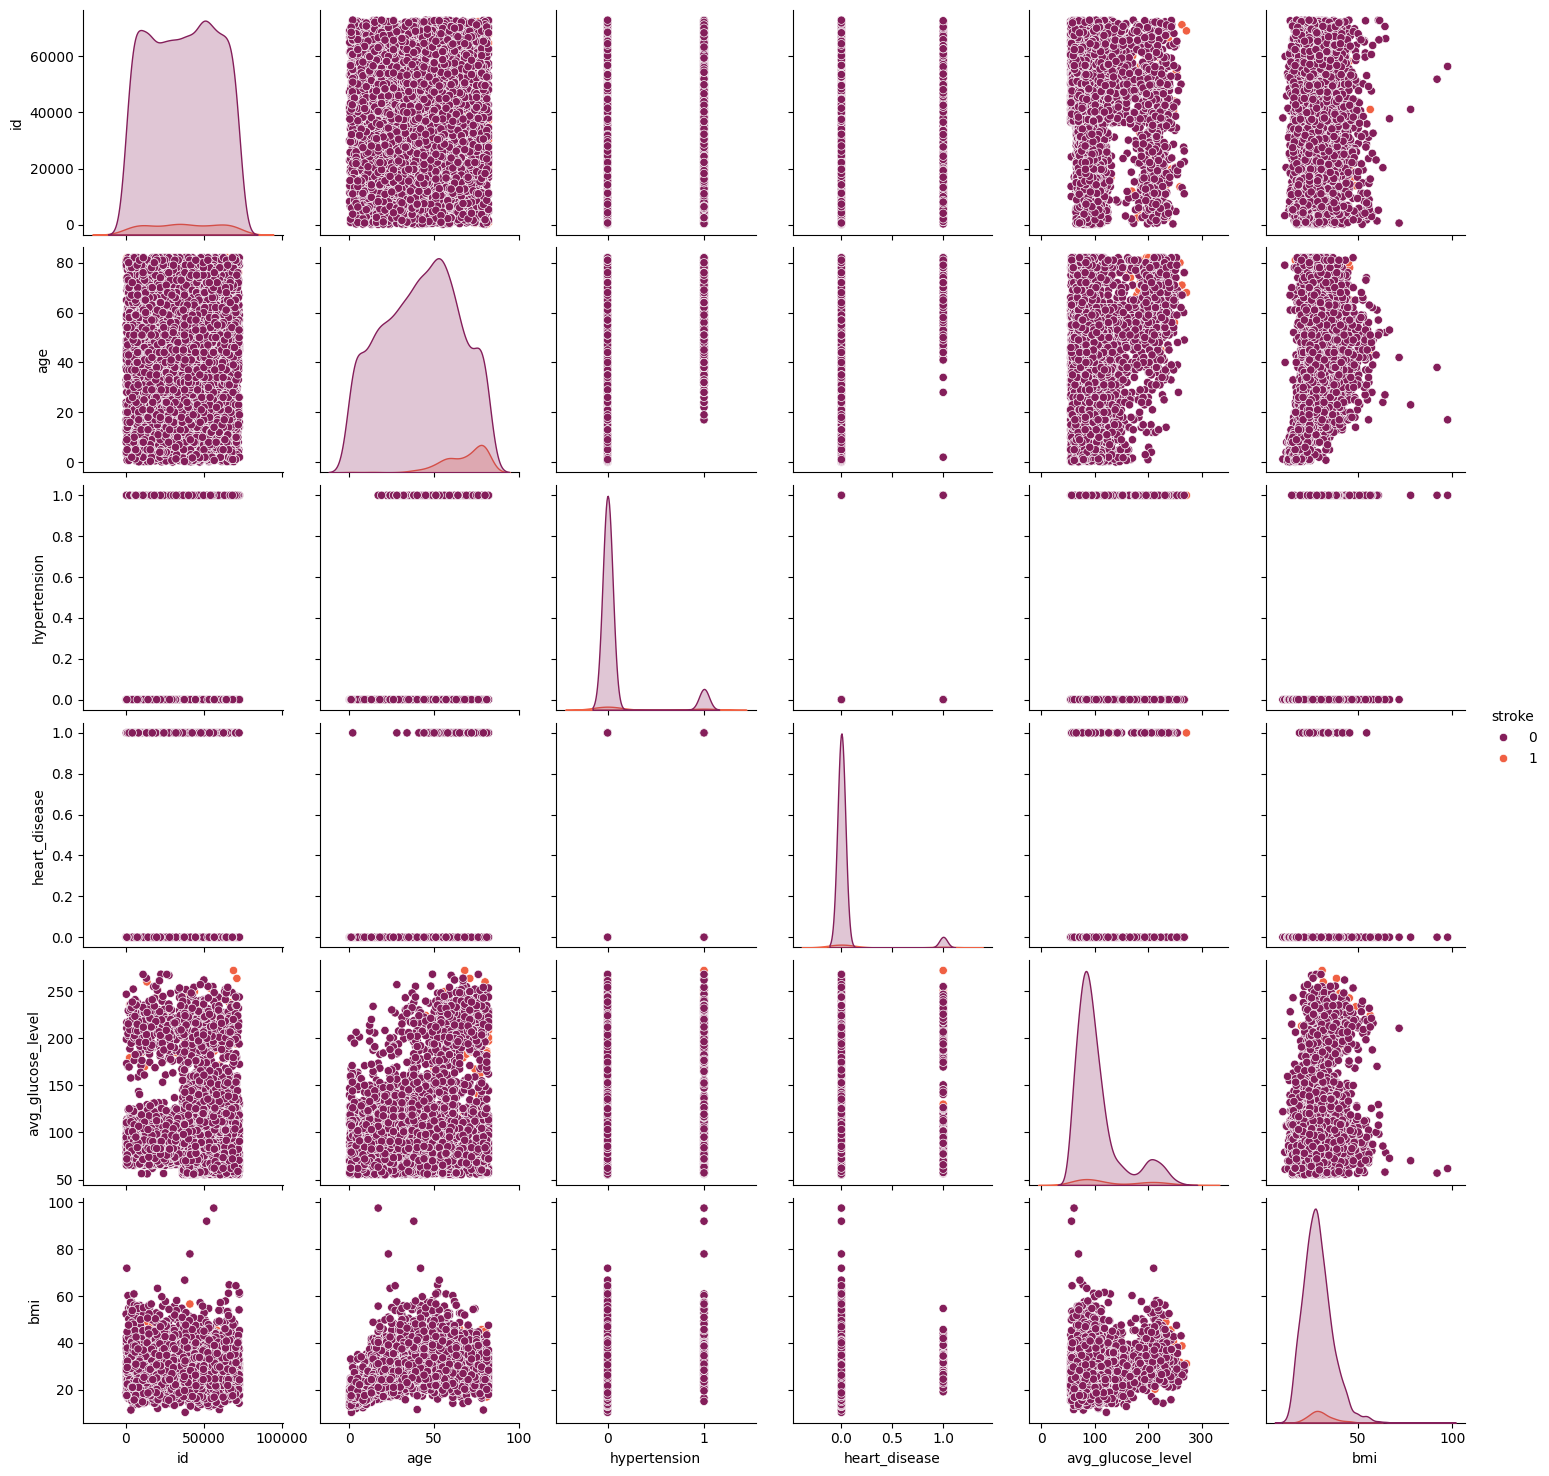

In [6]:
sns.pairplot(df, hue='stroke', palette='rocket')

####
----
####

#### Tratamento de dados:

##### Importando bibliotecas necessárias:

In [39]:
from sklearn.model_selection import train_test_split

##### Tratando dados:

##### Realizando o Split:

####
----
####

#### Preparando a predição:

##### Importando as bibliotecas necessárias

In [38]:
#Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn import set_config

#Kfold
from sklearn.model_selection import KFold, StratifiedKFold

#Grid
from sklearn.model_selection import GridSearchCV

#Scorers
from sklearn.metrics import recall_score, f1_score, precision_score, make_scorer

#Estimador:
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression

##### Definindo o Scaler:

##### Organizando o Pipeline:

##### Organizando o Grid:

####
----
####

#### Visualização de resultados:

##### Importando bibliotecas necessárias:

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

##### Visualizando resultados:

####
----
####

#### Conclusões:

####
----
####